## Кошман Дмитрий

# Лабораторная работа 1

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий, а также подкреплённый грамотной визуализацией. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета, кода и графиков. 

## Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают свою карму
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому, чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

## Данные

В данной лабораторной работе вы будете работать с данными из Dota2. 

Скачать датасет и подробно ознакомится с его описанием вы можете на странице первого конкурсного [соревнования](https://www.kaggle.com/t/8ddaf99c566b4d088b3e352ce1bbbc19).

## Маштабирование признаков

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [sklearn.preprocessing.MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

## Линейная регрессия и SGD

В данном блоке вам предстоит предсказать суммарное количество золота для команды `radiant` 

(игроки: `player_0`, `player_1`, `player_2`, `player_3`, `player_4`) на 600 секунде матча.

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

X = pd.read_csv('Dataset/gold.csv', index_col=[0, 1])

radiant_team = ['player_0', 'player_1', 'player_2', 'player_3', 'player_4']
dire_team = ['player_5', 'player_6', 'player_7', 'player_8', 'player_9']

Y = X.loc[pd.IndexSlice[:, 600], radiant_team].sum(axis=1).droplevel('times')
X = X.unstack().drop([(player, 600) for player in radiant_team], axis=1)

X.columns = ['{}_{}'.format(*column) for column in X.columns]

/Users/dimakoshman/.pyenv/versions/shad_env/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


%config InlineBackend.figure_format = 'svg' 
rcParams['figure.figsize'] = 10,5
warnings.filterwarnings('ignore')

Для оценки качества предсказания будем использовать [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). 

**Задание 1** (3 балла)

Реализуйте класс `CustomSGDRegressor`, который бы обучал многомерную линейную регрессию минимизируя сумму квадратов ошибки, используя `SGD`.

Класс, должен принимать следующие параметры при инициализации:
    
    learning_rate : float : параметр задающий скорось обучения
    fit_intercept : bool : если True, то добавляем свободный член
    max_iter : int : максимальное число эпох
    shuffle : bool : если True, то перемещиваем данные обучения перед каждой эпохой
    
и иметь методы `fit` и `predict`.

После обучения (запуска метода `fit`) мы должны мочь обратиться к атрибутам класса: 
    
    coef_  : ndarray of shape (n_features,)
    intercept_ : ndarray of shape (1,)

In [6]:
from sklearn.utils import shuffle


class CustomSGDRegressor:
    
    def __init__(self, *, 
                 learning_rate=1e-3,
                 fit_intercept=True,
                 max_iter=50,
                 shuffle=True):
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.shuffle = shuffle
    
    def fit(self, X, Y):
        if hasattr(X, 'values'):
            X = X.values
            
        if self.fit_intercept:
            X = np.hstack([np.ones((len(X), 1)), X])
            
        w = 2 * np.random.rand(X.shape[1]) - 1
        w /= np.linalg.norm(w)
        order = np.array(range(len(X)))
        
        for epoch in range(self.max_iter):
            if self.shuffle:
                order = shuffle(order)
                
            for i in order:
                X_i = X[i, :]
                f = X_i @ w
                err = f - Y.iloc[i]
                grad = 2 * X_i * err
                w -= self.learning_rate * grad
                
        if self.fit_intercept:
            self.intercept_, *self.coef_ = w
        else:
            self.intercept_ = 0
            self.coef_ = w
            
        return self
        
    def predict(self, X):
        X = np.hstack([np.ones((len(X), 1)), X])
        w = np.concatenate(([self.intercept_], self.coef_))
        return X @ w
        

Разбейте `X` и `Y` на `train` и `test`, используя [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

Далее вам нужно подобрать такой `learning_rate`, на котором достигается минимум среднеквадратичная ошибка, 

а также принять решение о необходимости масштабирования признаков.

Постройте соответствующие кривые обучения и сделайте выводы.

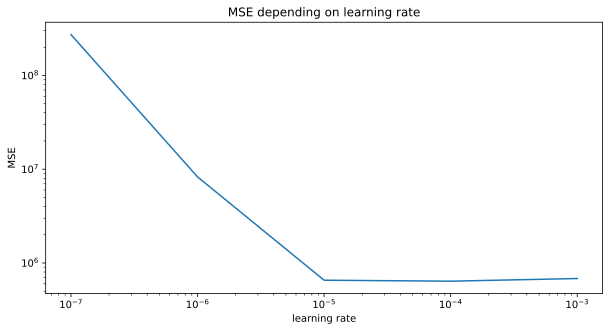

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


X_scaled = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=42)

kwargs = {'fit_intercept': True, 'max_iter': 30, 'shuffle': True}
custom_sgdr = CustomSGDRegressor(**kwargs)

custom_sgdr_mses = []
learning_rates = [10 ** -i for i in range(3, 8)]

for learning_rate in learning_rates:
    custom_sgdr.learning_rate = learning_rate
    custom_sgdr.fit(X_train, Y_train)
    custom_sgdr_mses.append(mean_squared_error(Y_test, custom_sgdr.predict(X_test)))

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(learning_rates, custom_sgdr_mses)
ax.set_title('MSE depending on learning rate')
ax.set_xlabel('learning rate')
ax.set_ylabel('MSE')
ax.set_yscale('log')
ax.set_xscale('log')

<b>Лучшее качество достигается при learning_rate=1e-4 и при ограничении на количество итераций.
Масштабирование признаков на качество модели не влияет, но делает более удобным подбор гиперпараметров и
сравнение моделей, так что впредь будем масштабировать.</b>

Обучите [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) выставив его параметры при инициализации так, что бы он максимально был близок к реализованной вами модели.

Сравните вашу реализацию и реализацию из sklearn: 
    
    1. Достигают ли они сравнимого качества на данном наборе данных?
    2. Одинаковая ли у них скорость сходимости? 
    3. Одинаковая ли скорость обучения при заданном количестве эпох?
    4. Похожие ли веса модели были найдены?
    
Если ваша реализация сильно отличается по данным параметрам от реализации из sklearn, то проанализируйте почему.

In [144]:
from sklearn.linear_model import SGDRegressor


custom_sgdr = CustomSGDRegressor(learning_rate=1e-4, **kwargs)
custom_sgdr.fit(X_train, Y_train)

sgdr = SGDRegressor(eta0=1e-4, learning_rate='constant', alpha=0, tol=None, **kwargs)
sgdr.fit(X_train, Y_train)

sgdr_MSE = []
custom_sgdr_MSE = []
iterations = range(5, 50, 5)

for it in iterations:
    custom_sgdr.max_iter = sgdr.max_iter = it
    sgdr_MSE.append([])
    custom_sgdr_MSE.append([])
    for i in range(5):
        sgdr.fit(X_train, Y_train)
        custom_sgdr.fit(X_train, Y_train)

        sgdr_MSE[-1].append(mean_squared_error(Y_test, sgdr.predict(X_test)))
        custom_sgdr_MSE[-1].append(mean_squared_error(Y_test, custom_sgdr.predict(X_test)))

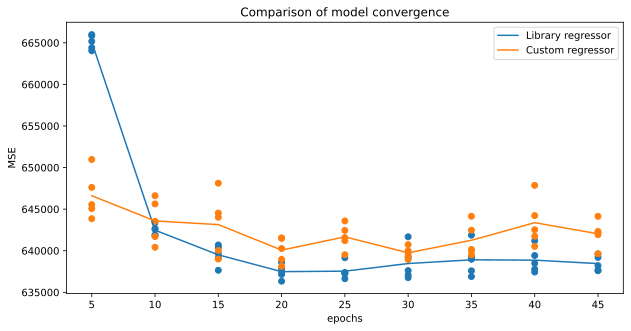

In [163]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter([i for i in iterations for j in range(5)], [j for i in sgdr_MSE for j in i])
ax.scatter([i for i in iterations for j in range(5)], [j for i in custom_sgdr_MSE for j in i])
ax.plot(iterations, [sum(i) / 5 for i in sgdr_MSE], label='Library regressor')
ax.plot(iterations, [sum(i) / 5 for i in custom_sgdr_MSE], label='Custom regressor')
ax.set_title('Comparison of model convergence')
ax.set_xlabel('epochs')
ax.set_ylabel('MSE')
ax.legend(loc="upper right");

<b>Обе модели достигают сравнимого качества и скорости обучения при заданном количестве эпох.
    Единственное, они значимо отличаются при малом количестве эпох - возможно из-за особенностей
    инициализации или имплементации батчей в библиотечной версии, в отличии от перебора по всем элементам выборки</b>

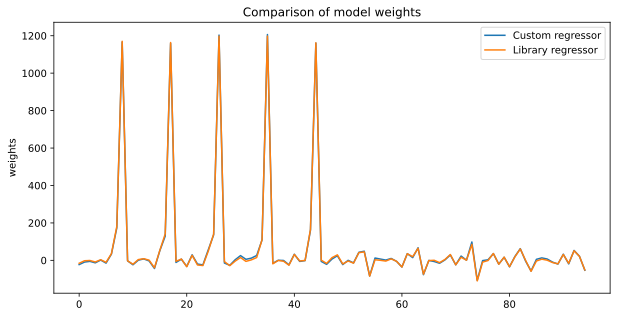

In [164]:
plt.plot(custom_sgdr.coef_, label='Custom regressor')
plt.plot(sgdr.coef_, label='Library regressor')
plt.title('Comparison of model weights')
plt.ylabel('weights')
plt.legend(loc="upper right");

<b>Веса модели были найдены похожие обеими моделями</b>

**Задание 2** (2 балла)

Повысьте качество модели `SGDRegressor` проведя эксперименты со стратегией обучения, а также с регуляризацией. 

Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

Какая комбинация стратегии обучения и регуляризации оказалась выигрышной?

<b>Будем жадно подбирать гиперпараметры модели:</b>

In [165]:
from sklearn.model_selection import GridSearchCV, KFold

In [168]:
parameters = {'eta0': (1e-3, 1e-4, 1e-5)}
clf = GridSearchCV(SGDRegressor(), parameters, cv=KFold(5))
clf.fit(X_scaled, Y);

In [332]:
def print_cv_results(cv_results):
    ax = pd.DataFrame(cv_results).loc[:, 'split0_test_score': 'split4_test_score'].T.plot(
        title='Model quality by parameters',
        ylabel='Test score',
        kind='box')
    ax.set_xticklabels(cv_results['params'], rotation=-25, rotation_mode="anchor", ha="left");

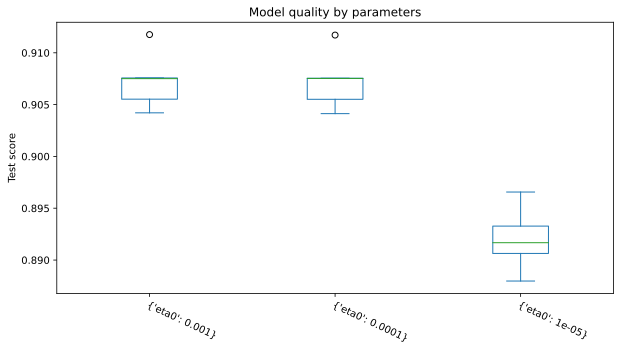

In [171]:
print_cv_results(clf.cv_results_)

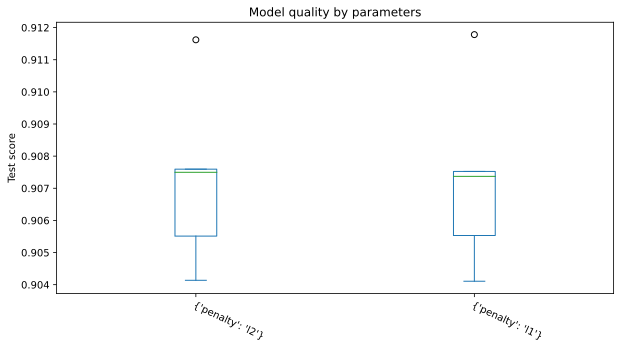

In [176]:
parameters = {'penalty': ('l2', 'l1')}
clf = GridSearchCV(SGDRegressor(eta0=1e-3), parameters, cv=KFold(5))
clf.fit(X_scaled, Y);
print_cv_results(clf.cv_results_)

<b>Выберем l1, поскольку качество одинаковое, но его l1 считать проще</b>

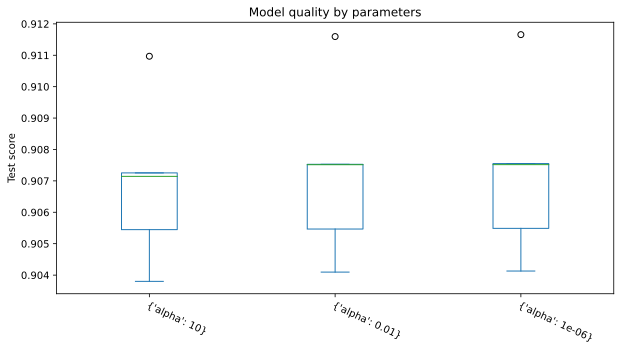

In [180]:
parameters = {'alpha': (10, 1e-2, 1e-6)}
clf = GridSearchCV(SGDRegressor(eta0=1e-3, penalty='l1'), parameters, cv=KFold(5))
clf.fit(X_scaled, Y);
print_cv_results(clf.cv_results_)

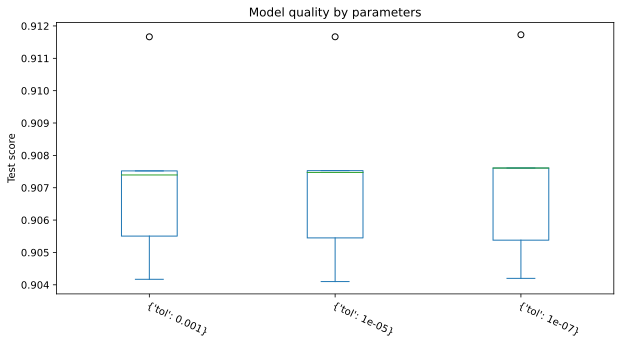

In [182]:
parameters = {'tol': (1e-3, 1e-5, 1e-7)}
clf = GridSearchCV(SGDRegressor(eta0=1e-3, penalty='l1', alpha=1e-2), parameters, cv=KFold(5))
clf.fit(X_scaled, Y);
print_cv_results(clf.cv_results_)

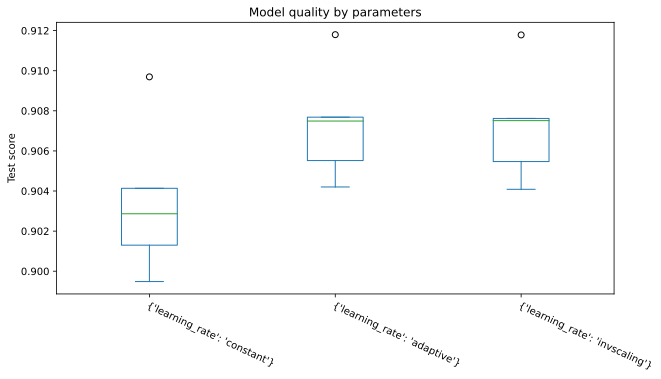

In [184]:
parameters = {'learning_rate': ('constant', 'adaptive', 'invscaling')}
clf = GridSearchCV(SGDRegressor(eta0=1e-3, penalty='l1', alpha=1e-2, tol=1e-7), parameters, cv=KFold(5))
clf.fit(X_scaled, Y);
print_cv_results(clf.cv_results_)

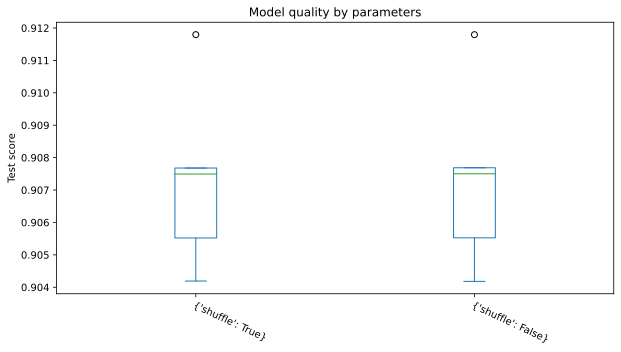

In [185]:
parameters = {'shuffle': (True, False)}
clf = GridSearchCV(SGDRegressor(eta0=1e-3, penalty='l1', alpha=1e-2, tol=1e-7, learning_rate='adaptive'),
                   parameters, cv=KFold(5))
clf.fit(X_scaled, Y);
print_cv_results(clf.cv_results_)

<b>Итого, оптимальные найденные параметры таковы:</b>

In [186]:
best_params = {'eta0': 1e-3,
               'penalty': 'l1',
               'alpha': 1e-2,
               'tol': 1e-7,
               'learning_rate': 'adaptive',
               'shuffle': True
              }

**Задание 3** (3 балла)

Попробуйте обогатить `X` данными из остальных таблиц, так что бы повысить качество модели `SGDRegressor`.

Проведите ряд экспериментов, целью которых будет выявить оптимальный набор данных для решения данной задачи. 

Все эксперименты должны быть подкреплены корректными и понятными графиками.

Опишите вашу стратегию добавления признаков и оценки их значимости, а также ответьте на вопросы:

1. Удалось ли повысить качество предсказания за счёт добавления новых признаков?
2. Есть ли признаки, добавление которых, ухудшило качество модели? Как вы думаете, почему так произошло?

In [230]:
def format_df(X):
    X = X.unstack()
    try:
        X = X.drop([(player, 600) for player in radiant_team], axis=1)
    except KeyError:
        pass
    X.columns = ['{}_{}'.format(*column) for column in X.columns]
    return X

In [255]:
X_lh = format_df(pd.read_csv('Dataset/lh.csv', index_col=[0, 1]))
X_xp = format_df(pd.read_csv('Dataset/xp.csv', index_col=[0, 1]))
X_items = format_df(pd.read_csv('Dataset/items.csv', index_col=[0, 1])).replace(np.nan, 0)
X_heroes = pd.read_csv('Dataset/heroes.csv', index_col=0)

In [237]:
def get_mse(X, Y):
    X = scale(X)
    kf = KFold()
    sgdr_MSE = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        sgdr = SGDRegressor(**best_params)
        sgdr.fit(X_train, Y_train)

        sgdr_MSE.append(mean_squared_error(Y_test, sgdr.predict(X_test)))
        
    return sgdr_MSE

In [ ]:
mse_gold = get_mse(X, Y)
mse_gold_lh = get_mse(pd.concat([X, X_lh], axis=1), Y)
mse_gold_xp = get_mse(pd.concat([X, X_xp], axis=1), Y)
mse_gold_heroes = get_mse(pd.concat([X, X_heroes], axis=1), Y)
mse_gold_items = get_mse(pd.concat([X, X_items.loc[:, X_items.sum() > 10000]], axis=1), Y)

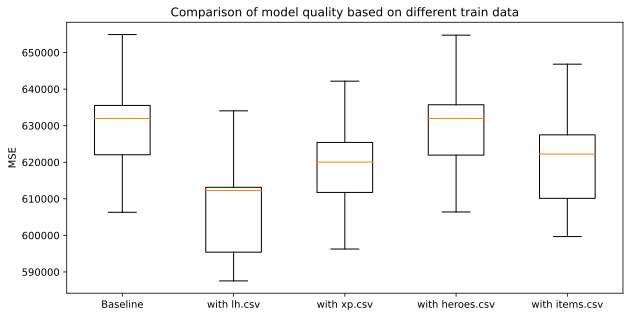

In [292]:
fig = plt.figure()
ax = fig.add_subplot()
ax.boxplot([mse_gold, mse_gold_lh, mse_gold_xp, mse_gold_heroes, mse_gold_items]);
ax.set_title('Comparison of model quality based on different train data')
ax.set_xticklabels(['Baseline', 'with lh.csv', 'with xp.csv', 'with heroes.csv', 'with items.csv'])
ax.set_ylabel('MSE');

<b>Качество модели повысить не удалось, что неудивительно - изначально у нас были данные по золоту за 1 минуту
до того момента, когда нам нужно предсказывать, все остальные данные коррелируют гораздо слабее с таргетом.
Добавление новых данных только привело к зашумлению. Для улучшения качества необходимы данные, которые помогут
понять, что происходило в последнюю минуту матча. Развивая эту идею, я добавил в train данные по событиям
за последнюю минуту матча и придал им большой вес:</b>

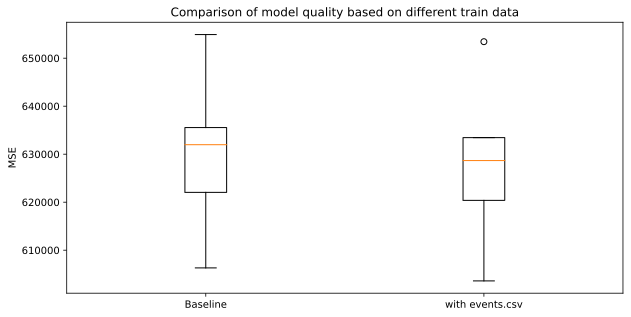

In [414]:
X_events = pd.read_csv('Dataset/events.csv', index_col=0)
X_events.from_team.replace({'dire': 0, 'radiant': 1}, inplace=True)

X_events = pd.concat([X_events,
                      X_events.event_type.where(X_events.from_team == 0, 0),
                      X_events.event_type.where(X_events.from_team == 1, 0)],
                     axis=1)
X_events.where(X_events.time > 540, 0, inplace=True)
X_events = X_events.groupby(X_events.index).first()
X_events = X_events.reindex(index=X.index)

X_events.replace(np.nan, 0, inplace=True)
X_events = X_events.iloc[:, 3:]

X_events *= 1000

mse_gold_events = get_mse(pd.concat([X, X_events], axis=1), Y)

fig = plt.figure()
ax = fig.add_subplot()
ax.boxplot([mse_gold, mse_gold_events]);
ax.set_title('Comparison of model quality based on different train data')
ax.set_xticklabels(['Baseline', 'with events.csv'])
ax.set_ylabel('MSE');

<b>Не помогло - видимо отчасти потому, что события, которые записаны в таблице events.csv не сильно влияют на
количество золота, а больше на общий ход игры.</b>

## Бинарная классификация

**Задание 4** (3 балла)

Реализуйте класс `CustomSGDClassifier`, который бы обучал логистическую регрессию, используя `SGD`.

Класс, должен принимать следующие параметры при инициализации:
    
    learning_rate : float : параметр задающий скорось обучения
    fit_intercept : bool : если True, то добавляем свободный член
    max_iter : int : максимальное число эпох
    shuffle : bool : если True, то перемещиваем данные обучения перед каждой эпохой
    
и иметь методы `fit`, `predict` и `predict_proba`.

После обучения (запуска метода `fit`) мы должны мочь обратиться к атрибутам класса: 
    
    coef_  : ndarray of shape (n_features,)
    intercept_ : ndarray of shape (1,)

In [19]:
from sklearn.utils import shuffle


class CustomSGDClassifier:
    def __init__(self, *, 
                 learning_rate=1e-3,
                 fit_intercept=True,
                 max_iter=50,
                 shuffle=True):
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.shuffle = shuffle
    
    @staticmethod
    def sigmoid(X):
        return 1 / (1 + np.exp(X))
    
    def fit(self, X, Y):
        if hasattr(X, 'values'):
            X = X.values
            
        if self.fit_intercept:
            X = np.hstack([np.ones((len(X), 1)), X])
            
        w = 2 * np.random.rand(X.shape[1]) - 1
        w /= np.linalg.norm(w)
        order = np.array(range(len(X)))
        
        for epoch in range(self.max_iter):
            if self.shuffle:
                order = shuffle(order)
                
            for i in order:
                X_i = X[i, :]
                f = self.sigmoid(-X_i @ w)
                err = Y.iloc[i] - f
                w += self.learning_rate * err * X_i
                
        if self.fit_intercept:
            self.intercept_, *self.coef_ = w
        else:
            self.intercept_ = 0
            self.coef_ = w
            
        return self
        
    def predict(self, X):
        return (self.predict_proba(X) <= 0.5).astype(np.int32)
    
    def predict_proba(self, X):
        X = np.hstack([np.ones((len(X), 1)), X])
        w = np.concatenate(([self.intercept_], self.coef_))
        return self.sigmoid(X @ w).flatten()
        

Используя `CustomSGDClassifier` научитесь прогнозировать победу команды Radiant.

Оптимальный набор гиперпараметров и признаков отберите, опираясь на такие метрики, как `precision`,  `recall` и `ROC-AUC`.
    
Все эксперименты должны быть подкреплены корректными и понятными графиками.

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, prec

In [957]:
train = pd.read_csv('Dataset/train.csv', index_col=0)

X_ = X.loc[train.index]
X_ = scale(X_)
Y_ = train.radiant_won

X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.33, random_state=42)

custom_class = CustomSGDClassifier(learning_rate=1e-4, max_iter=30)
custom_class.fit(X_train, Y_train)

Y_pred_proba = custom_class.predict_proba(X_test)
Y_pred = custom_class.predict(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

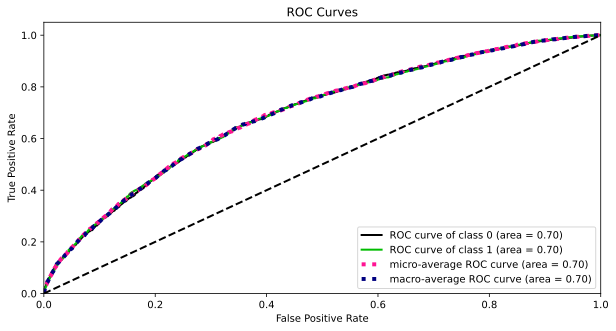

In [450]:
import scikitplot as skplt

skplt.metrics.plot_roc_curve(Y_test.values, np.vstack((Y_pred_proba, 1 - Y_pred_proba)).T)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

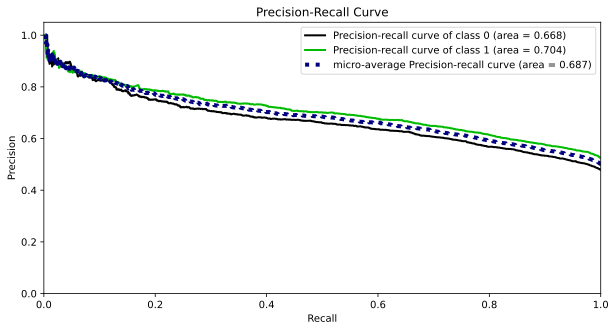

In [451]:
skplt.metrics.plot_precision_recall_curve(Y_test.values, np.vstack((Y_pred_proba, 1 - Y_pred_proba)).T)

In [472]:
roc_auc_score(Y_test, Y_pred)

0.6438601714736986

**Задание 5** (2 балла)

Попробуйте повысить качество предсказания, используя:

 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
 
Проведите эксперементы по подбору гиперпараметров. Какой алгоритм показал наилучшее качество?

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

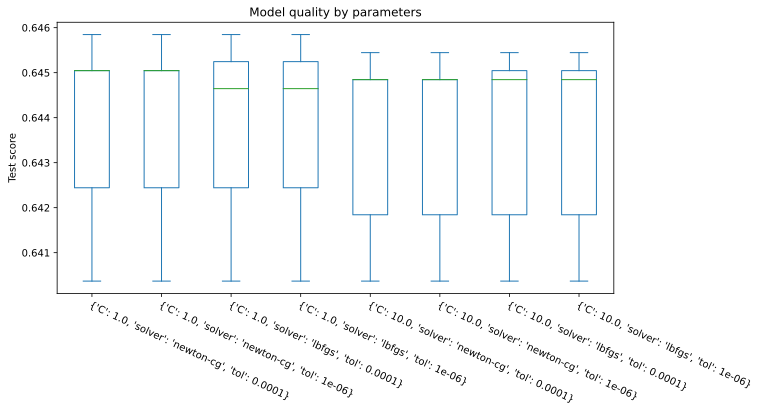

In [497]:
parameters = {'tol': (1e-4, 1e-6), 'C': (1.0, 10.0), 'solver' : ('newton-cg', 'lbfgs')}
clf0 = GridSearchCV(LogisticRegression(), parameters, cv=KFold(5))
clf0.fit(X_, Y_);
print_cv_results(clf0.cv_results_)

In [983]:
log_reg = LogisticRegression(C=1.0, solver='liblinear', tol=0.0001)
log_reg.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

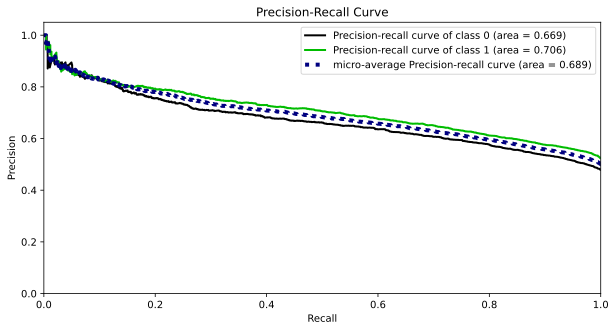

In [986]:
skplt.metrics.plot_precision_recall_curve(Y_test, log_reg.predict_proba(X_test))

<AxesSubplot:title={'center':'LogReg ROC curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

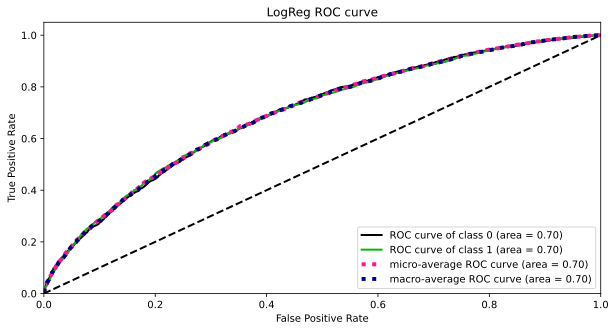

In [985]:
skplt.metrics.plot_roc_curve(Y_test, log_reg.predict_proba(X_teset), title='LogReg ROC curve')

Может ли масштабирование повлиять на работу этих алгоритмов?

In [984]:
roc_auc_score(Y_test, np.where(log_reg.predict_proba(X_test)[:, 0] > 0.5, 0, 1))

0.6463579776620648

In [958]:
svc = SVC()
svc.fit(X_train, Y_train)
roc_auc_score(Y_test, svc.predict(X_test))

0.6343503697735005

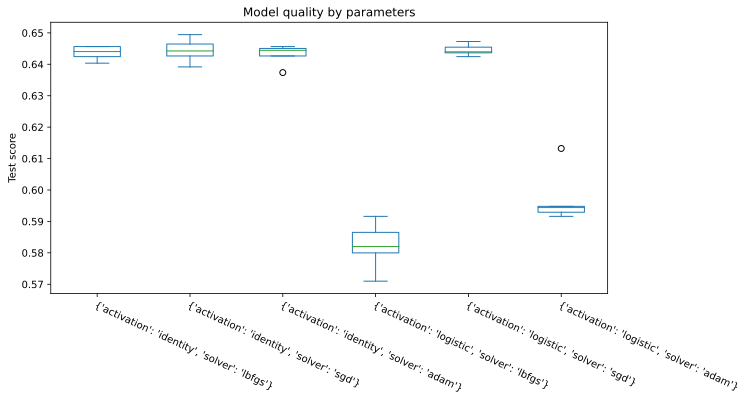

In [503]:
parameters = {'activation': ('identity', 'logistic'), 'solver': ('lbfgs', 'sgd', 'adam')}
clf = GridSearchCV(MLPClassifier(), parameters, cv=KFold(5))
clf.fit(X_, Y_);
print_cv_results(clf.cv_results_)

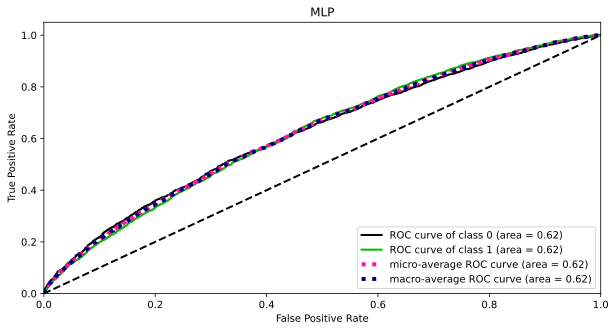

In [484]:
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)
skplt.metrics.plot_roc_curve(Y_test, mlp.predict_proba(X_test), title='MLP ROC curve');

In [486]:
roc_auc_score(Y_test, mlp.predict(X_test))

0.5842397115072795

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 6** (2 балла)

Для каждого типа классификатора, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

<b>Диаграммы размаха изображены в предыдущем задании. Лучшее качество показал C-Support Vector Classification. Логистическая регрессия делает то же, что и
написанный класс, а MLP сильно переобучается. В общем случае перебор признаков занимает экспоненциальное
количество времени, поэтому следует опираться на эвристики и опыт.</b>

In [451]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_validate
import scikitplot as skplt

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


%config InlineBackend.figure_format = 'svg' 
rcParams['figure.figsize'] = 10,5
warnings.filterwarnings('ignore')

In [415]:
X_lh = pd.read_csv('Dataset/lh.csv', index_col=[0, 1])
X_xp = pd.read_csv('Dataset/xp.csv', index_col=[0, 1])
X_items = pd.read_csv('Dataset/items.csv', index_col=[0, 1])
X_heroes = pd.read_csv('Dataset/heroes.csv', index_col=0)
X_gold = pd.read_csv('Dataset/gold.csv', index_col=[0, 1])
X_events = pd.read_csv('Dataset/events.csv', index_col=0)

train = pd.read_csv('Dataset/train.csv', index_col=0)
test = pd.read_csv('Dataset/test.csv', index_col=0)

In [416]:
period = list(range(600, 601, 60))
idx = pd.IndexSlice
X_lh_form = X_lh.loc[idx[:, period], :].unstack()
X_xp_form = X_xp.loc[idx[:, period], :].unstack()
X_gold_form = X_gold.loc[idx[:, period], :].unstack()

X_lh_form.columns = ['lh_{}_{}'.format(*column) for column in X_lh_form.columns]
X_xp_form.columns = ['xp_{}_{}'.format(*column) for column in X_xp_form.columns]
X_gold_form.columns = ['gold_{}_{}'.format(*column) for column in X_gold_form.columns]

In [417]:
X_events = pd.get_dummies(X_events, columns=['from_team', 'event_type']).drop('time', axis=1)
events = X_events.loc[:, 'event_type_0': 'event_type_6']
X_events = pd.concat([(events.T * X_events.from_team_dire).T,
                      (events.T * X_events.from_team_radiant).T], axis=1)
X_events = X_events.groupby(X_events.index).sum()
X_events_form = X_events.reindex(index=X_lh_form.index).replace(np.nan, 0)

X_events_form.columns = ['dire_{}'.format(column) for column in X_events_form.columns[:7]] + \
['radiant_{}'.format(column) for column in X_events_form.columns[7:]]

In [418]:
X_items = X_items.unstack().replace(np.nan, 0)

X_items.columns = ['{}_player{}'.format(*column) for column in X_items.columns]
# item_cor = pd.concat([X_items.loc[train.index], train], axis=1).corr().radiant_won.dropna().sort_values()

it_cor_idx = item_cor.apply(abs).sort_values()[-50:].index

it_cor_idx = it_cor_idx.drop('radiant_won')

X_items = X_items.loc[:, it_cor_idx]

In [438]:
for hero in np.unique(X_heroes.values):
    X_heroes = pd.concat([X_heroes, (hero == X_heroes.iloc[:, 0:5]).any(axis=1)],axis=1)
    X_heroes = pd.concat([X_heroes, (hero == X_heroes.iloc[:, 5:10]).any(axis=1)],axis=1)
X_heroes = X_heroes.iloc[:, 10:].astype(np.int32)

X_heroes.columns = ['hero{}_team_{}'.format(i % 111, 'radiant' if i < 111 else 'dire') for i, el in enumerate(X_heroes.columns)]
# heroes_cor = pd.concat([X_heroes.loc[train.index], train], axis=1).corr().radiant_won.dropna().sort_values()

it_cor_idx = heroes_cor.apply(abs).sort_values()[-100:].index

it_cor_idx = it_cor_idx.drop('radiant_won')

X_heroes = X_heroes.loc[:, it_cor_idx]

In [419]:
result = X_heroes.copy()
for i, col in enumerate(X_heroes.columns):
    result = pd.concat([result,
        pd.get_dummies(X_heroes.loc[:, col], prefix=f'{col}_hero').mul(X_gold_form.iloc[:, i], axis=0)],
                      axis=1)
X_heroes_and_gold = result.iloc[:,10:]

In [420]:
X_gold_p3 = X_gold_form.apply(lambda x: x**3)
X_gold_p3.columns = ['p3_{}'.format(i) for i in X_gold_p3.columns]
X_gold_p2 = X_gold_form.apply(lambda x: x**2)
X_gold_p2.columns = ['p2_{}'.format(i) for i in X_gold_p2.columns]
X_xp_p2 = X_xp_form.apply(lambda x: x**2)
X_xp_p2.columns = ['p2_{}'.format(i) for i in X_xp_p2.columns]

In [439]:
# X = pd.concat([X_lh_form, X_xp_form, X_gold_form, X_events_form, X_items, X_heroes], axis=1)
# X = pd.concat([X_gold_form, X_events_form, X_items, X_heroes], axis=1)
# X = pd.concat([X_xp_form, X_lh_form, X_gold_p2, X_gold_form, X_events_form, X_items, X_heroes], axis=1)
X = pd.concat([X_heroes_and_gold, X_heroes, X_xp_form, X_gold_p2, X_lh_form, X_events_form, X_items], axis=1)
# X = pd.concat([X_gold_form], axis=1)

In [428]:
# heroes_and_goldcor = \
# pd.concat([X_heroes_and_gold.loc[train.index], train], axis=1).corr().radiant_won.dropna().sort_values()
it_cor_idx = heroes_and_goldcor.apply(abs).sort_values()[-200:].index

it_cor_idx = it_cor_idx.drop('radiant_won')

X_heroes_and_gold = X_heroes_and_gold.loc[:, it_cor_idx]

In [440]:
X_train, X_test, Y_train, Y_test = train_test_split(X.loc[train.index], train, test_size=0.1)

In [441]:
clf = make_pipeline(StandardScaler(), LogisticRegression(solver='newton-cg'))
cv_results = cross_validate(clf, X.loc[train.index], train, cv=5, scoring='roc_auc')
# clf.fit(X_train, Y_train)
# roc_auc_score(Y_test, [i[1] for i in clf.predict_proba(X_test)])
sum(cv_results['test_score']) / len(cv_results['test_score'])

0.7577356491364637

In [442]:
clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
# clf.fit(X_train, Y_train)
# roc_auc_score(Y_test, [i[1] for i in clf.predict_proba(X_test)])
cv_results = cross_validate(clf, X.loc[train.index], train, cv=5, scoring='roc_auc')
sum(cv_results['test_score']) / len(cv_results['test_score'])

0.7573341816795738

In [443]:
# X_gold_form_s = pd.DataFrame(scale(X_gold_p2), index=X_gold_p2.index, columns=X_gold_p2.columns)
# X = pd.concat([X_gold_form_s, X_events_form, X_items, X_heroes], axis=1)

In [444]:
lda =LinearDiscriminantAnalysis()
lda.fit(scale(X_train), Y_train)

LinearDiscriminantAnalysis()

In [445]:
pd.DataFrame([X_train.columns, lda.coef_[0]]).T.sort_values(by=1).to_csv('lda_coef.csv')

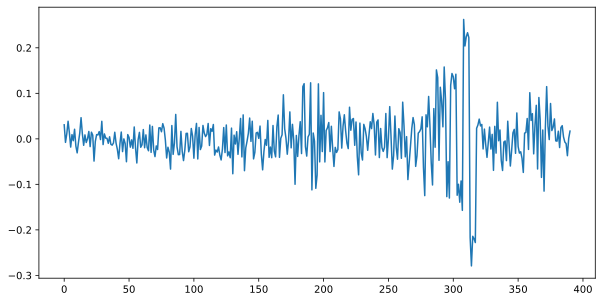

In [446]:
plt.plot(lda.coef_[0]);

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

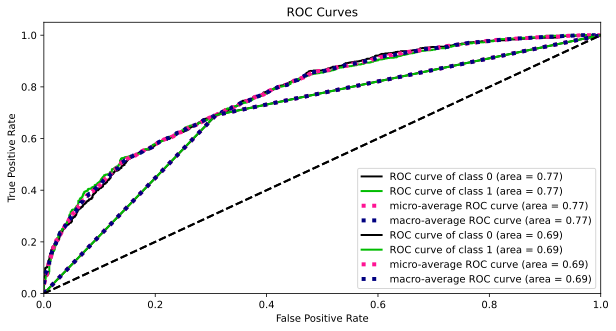

In [459]:
fig = plt.figure()
ax = fig.add_subplot()
skplt.metrics.plot_roc_curve(Y_test, clf.predict_proba(X_test), ax=ax)
skplt.metrics.plot_roc_curve(Y_test, np.vstack((1-clf.predict(X_test), clf.predict(X_test))).T, ax=ax)

In [414]:
parameters = {'solver' : ('newton-cg', 'liblinear', 'sag', 'saga')}
clf0 = GridSearchCV(LogisticRegression(), parameters, cv=KFold(5))
clf0.fit(X_train, Y_train);
print_cv_results(clf0.cv_results_)

KeyboardInterrupt: 

In [ ]:
plt.plot(lda.coef_[0]);

In [ ]:
# clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))
clf.fit(X_train, Y_train)
roc_auc_score(Y_test, clf.predict(X_test))

/Users/dimakoshman/.pyenv/versions/shad_env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [128]:
pd.concat([X_xp_form.loc[train.index], train], axis=1).corr().radiant_won.sort_values()

xp_player_9_600   -0.085519
xp_player_5_600   -0.078844
xp_player_7_600   -0.077021
xp_player_8_600   -0.068154
xp_player_6_600   -0.064827
xp_player_1_600    0.066753
xp_player_3_600    0.072102
xp_player_0_600    0.073458
xp_player_2_600    0.076071
xp_player_4_600    0.079886
radiant_won        1.000000
Name: radiant_won, dtype: float64

In [129]:
pd.concat([X_gold_form.loc[train.index], train], axis=1).corr().radiant_won.sort_values()

gold_player_9_600   -0.103370
gold_player_5_600   -0.102491
gold_player_7_600   -0.095945
gold_player_8_600   -0.092496
gold_player_6_600   -0.090649
gold_player_1_600    0.090010
gold_player_3_600    0.097328
gold_player_2_600    0.098528
gold_player_4_600    0.100036
gold_player_0_600    0.103723
radiant_won          1.000000
Name: radiant_won, dtype: float64

In [115]:
pd.concat([X_events_form.loc[train.index], train], axis=1).corr().radiant_won.sort_values()

dire_event_type_3      -0.112376
dire_event_type_6      -0.095718
dire_event_type_0      -0.031122
dire_event_type_4      -0.030282
radiant_event_type_5   -0.024584
dire_event_type_2      -0.011397
dire_event_type_1      -0.004084
radiant_event_type_2    0.008440
radiant_event_type_1    0.008607
dire_event_type_5       0.010852
radiant_event_type_4    0.025007
radiant_event_type_0    0.025682
radiant_event_type_6    0.100704
radiant_event_type_3    0.110000
radiant_won             1.000000
Name: radiant_won, dtype: float64

In [118]:
pd.concat([X_heroesoes.loc[train.index], train], axis=1).corr().radiant_won.sort_values()

hero59_team_radiant    -0.050777
hero101_team_radiant   -0.049687
hero20_team_dire       -0.045106
hero88_team_radiant    -0.041425
hero78_team_dire       -0.038831
                          ...   
hero58_team_radiant     0.042893
hero49_team_radiant     0.045765
hero77_team_dire        0.046115
hero19_team_dire        0.050626
radiant_won             1.000000
Name: radiant_won, Length: 223, dtype: float64

In [779]:
X = pd.concat([X_lh_form, X_xp_form, X_gold_form, X_events_form], axis=1)
X_ = X.loc[train.index]
X_ = scale(X_)
Y = train.radiant_won

X_train, X_test, Y_train, Y_test = train_test_split(X_, Y, test_size=0.33, random_state=42)

In [780]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [793]:
log_reg.fit(X_lh_form.loc[train.index], Y)
roc_auc_score(Y, log_reg.predict(X_lh_form.loc[train.index]))

0.5931760829351009

In [795]:
log_reg.fit(X_gold_form.loc[train.index], Y)
roc_auc_score(Y, log_reg.predict(X_gold_form.loc[train.index]))

0.6497331714711473

In [812]:
X_g_s = scale(X_gold_form)
X_g_s = pd.DataFrame(X_g_s, index=X_gold_form.index)
log_reg.fit(X_g_s.loc[train.index], Y)
roc_auc_score(Y, log_reg.predict(X_g_s.loc[train.index]))

0.6490873991572891

In [796]:
log_reg.fit(X_events_form.loc[train.index], Y)
roc_auc_score(Y, log_reg.predict(X_events_form.loc[train.index]))

0.5745438697908637

In [797]:
log_reg.fit(X_xp_form.loc[train.index], Y)
roc_auc_score(Y, log_reg.predict(X_xp_form.loc[train.index]))

0.6371544563485947

In [791]:
roc_auc_score(Y_test, log_reg.predict(X_test))

ValueError: X has 314 features per sample; expecting 100

In [1048]:
X_w0 = pd.concat([X_w.iloc[:, 0:5].sum(axis=1),
           X_w.iloc[:, 5:10].sum(axis=1),
           X_w.iloc[:, 10:15].sum(axis=1),
           X_w.iloc[:, 15:20].sum(axis=1),
          X_w.iloc[:, 20:25].sum(axis=1),
          X_w.iloc[:, 25:30].sum(axis=1)], axis=1)


In [1040]:
pd.concat([X_w.iloc[:, 0:5].sum(axis=1), train], axis=1).corr().radiant_won

0              0.255427
radiant_won    1.000000
Name: radiant_won, dtype: float64

In [1033]:
pd.concat([X_w, train], axis=1).corr().radiant_won

(player_0, 600)    0.103723
(player_1, 600)    0.090010
(player_2, 600)    0.098528
(player_3, 600)    0.097328
(player_4, 600)    0.100036
(player_5, 600)   -0.102491
(player_6, 600)   -0.090649
(player_7, 600)   -0.095945
(player_8, 600)   -0.092496
(player_9, 600)   -0.103370
(player_0, 600)    0.073458
(player_1, 600)    0.066753
(player_2, 600)    0.076071
(player_3, 600)    0.072102
(player_4, 600)    0.079886
(player_5, 600)   -0.078844
(player_6, 600)   -0.064827
(player_7, 600)   -0.077021
(player_8, 600)   -0.068154
(player_9, 600)   -0.085519
(player_0, 600)    0.043945
(player_1, 600)    0.037175
(player_2, 600)    0.043340
(player_3, 600)    0.041660
(player_4, 600)    0.050186
(player_5, 600)   -0.044587
(player_6, 600)   -0.035539
(player_7, 600)   -0.041365
(player_8, 600)   -0.039818
(player_9, 600)   -0.047739
radiant_won        1.000000
Name: radiant_won, dtype: float64

<AxesSubplot:>

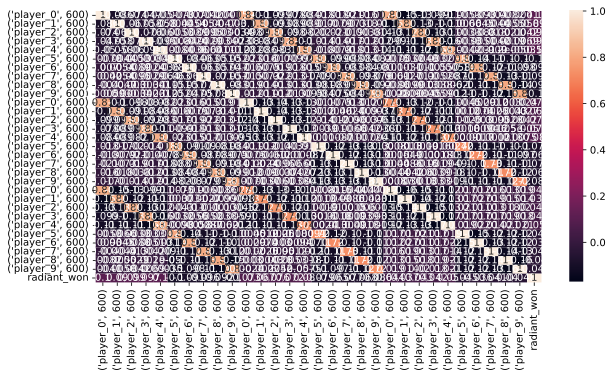

In [1000]:
import seaborn as sns

Var_Corr = pd.concat([X_w, train], axis=1).corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [ ]:
1

In [ ]:


X_w = pd.concat([X_gold_form, X_xp_form, X_lh_form, X_events_form, X_items, X_heroes], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_w.loc[train.index], train, test_size=0.33)
clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))
# clf = make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(X_train, Y_train)
roc_auc_score(Y_test, clf.predict(X_test))

In [989]:
X_w = pd.concat([X_gold_form, X_xp_form, X_lh_form], axis=1)

In [942]:
X_w_s = scale(X_w)
X_w_s = pd.DataFrame(X_w_s, index=X_w.index)

In [946]:
X_w_s = pd.concat([X_w_s, X_events_form, X_items], axis=1)

In [882]:
X_w_s

,0,1,2,3,4,5,6,7,8,9,...,event_type_4,event_type_5,event_type_6,event_type_0,event_type_1,event_type_2,event_type_3,event_type_4,event_type_5,event_type_6
mid,,,,,,,,,,,,,,,,,,,,,
0,-0.460819,0.883620,-1.022316,0.302363,1.318719,0.005361,0.009184,1.420892,-1.704481,1.827721,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.176482,1.291373,-0.146754,0.248927,1.321671,2.659065,0.808769,-0.933944,0.328328,0.498696,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.350943,-1.514322,3.321283,0.276011,-0.811136,-0.716695,-1.259380,0.836084,-1.101751,-1.110322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.458622,1.073512,0.301579,-0.770018,0.255267,-0.532482,0.603076,-1.559622,0.993203,-1.294469,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.298934,0.071793,0.827062,-0.719510,-1.396367,-0.107090,-0.367047,-0.455398,0.341805,-1.314846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,-0.241066,-0.330808,0.997370,-0.455258,1.229422,-0.896469,0.345773,-0.274085,3.177255,1.234527,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49944,0.594729,-1.049160,0.066495,1.169053,-0.912242,-0.370463,1.330106,1.139263,0.002629,-0.705804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49945,-1.287824,-1.613684,-1.082724,0.581256,1.161526,-1.348494,-1.215997,1.480338,1.139205,-1.447673,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


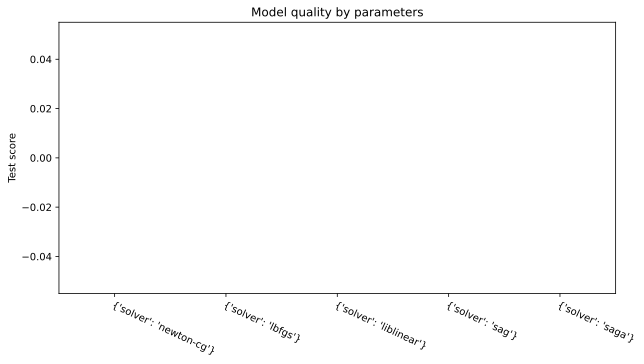

In [918]:
parameters = {'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
clf0 = GridSearchCV(LogisticRegression(), parameters, cv=KFold(5), scoring='roc_auc')
clf0.fit(X_w_s.loc[train.index], Y);
print_cv_results(clf0.cv_results_)

In [917]:
pd.DataFrame(clf0.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.816799,0.331555,0.002320,0.000744,newton-cg,{'solver': 'newton-cg'},0.702883,0.704364,0.706143,0.687263,0.702872,0.700705,0.006828,5
1,0.552431,0.050728,0.002256,0.000414,lbfgs,{'solver': 'lbfgs'},0.703541,0.704570,0.706322,0.687143,0.703274,0.700970,0.006996,1
2,3.656910,0.424707,0.002064,0.000054,liblinear,{'solver': 'liblinear'},0.702889,0.704362,0.706144,0.687257,0.702884,0.700707,0.006831,4
3,2.734453,0.003363,0.001967,0.000024,sag,{'solver': 'sag'},0.703000,0.704327,0.706156,0.687284,0.702852,0.700724,0.006824,3
4,2.839904,0.062370,0.002036,0.000071,saga,{'solver': 'saga'},0.703250,0.704400,0.706224,0.687302,0.702931,0.700822,0.006857,2


In [ ]:
X_w_s = scale(X_w_s)
X_w_s = pd.DataFrame(X_w_s, index=X_w.index)

In [947]:
X_train, X_test, Y_train, Y_test = train_test_split(X_w_s.loc[train.index], Y, test_size=0.33)

In [924]:
clf0.best_estimator_.fit(X_train, Y_train)
roc_auc_score(Y_test, clf0.best_estimator_.predict(X_test))

0.6430358694692699

In [950]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)
roc_auc_score(Y_test, lg.predict(X_test))

0.6357791482983544

In [951]:
SVC(kernel="linear", C=0.025)
svc.fit(X_train, Y_train)
roc_auc_score(Y_test, svc.predict(X_test))

0.6517889208586178

In [929]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, Y_train)
roc_auc_score(Y_test, kn.predict(X_test))

0.5520581423595143

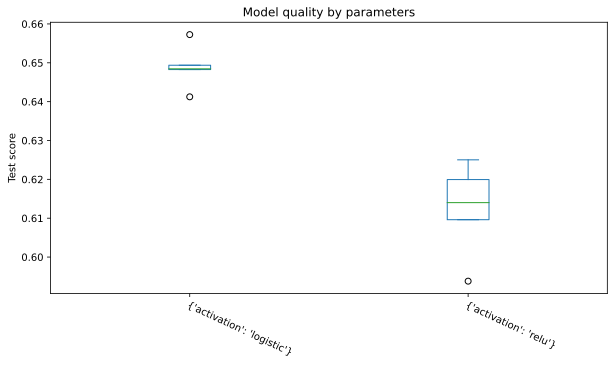

In [890]:
parameters = {'activation': ('logistic', 'relu')}
clf0 = GridSearchCV(MLPClassifier(), parameters, cv=KFold(5))
clf0.fit(X_w_s.loc[train.index].values, Y);
print_cv_results(clf0.cv_results_)

In [349]:
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, Y_train)
roc_auc_score(Y_test, clf.predict(X_test))

0.6965166936540982

In [447]:
#predictions = svc.predict(X.loc[test.index])
# predictions = svc.predict(X_gold_form.loc[test.index])
# predictions = svc.predict(X_w_s.loc[test.index])
# lr = LogisticRegression()
# lr.fit(X_w_s.loc[train.index].values, Y)
clf.fit(X.loc[train.index], train)
predictions = [i[1] for i in clf.predict_proba(X.loc[test.index])]
pred = pd.DataFrame(predictions, columns=['radiant_win'])
pred.index.name = 'mid'
pred.index = test.index
pred.to_csv('dota2_predictions.csv')

In [448]:
roc_auc_score(train, [i[1] for i in clf.predict_proba(X.loc[train.index])])

0.7753748073069215

In [90]:
pred

,radiant_win
mid,
3,0.607135
7,0.606575
9,0.241996
10,0.319656
12,0.353442
...,...
49936,0.605195
49942,0.335848
49943,0.318464
